
Task 1: Drawing lines in all 8 octants


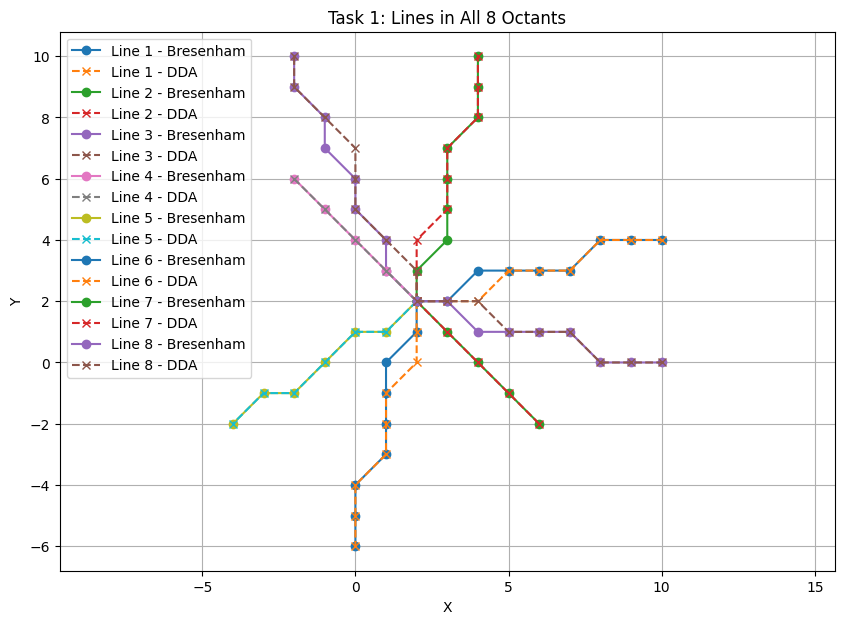


Task 2: Comparing Bresenham vs DDA for (0,0) to (8,5)
Bresenham pixel count: 9
DDA pixel count      : 9


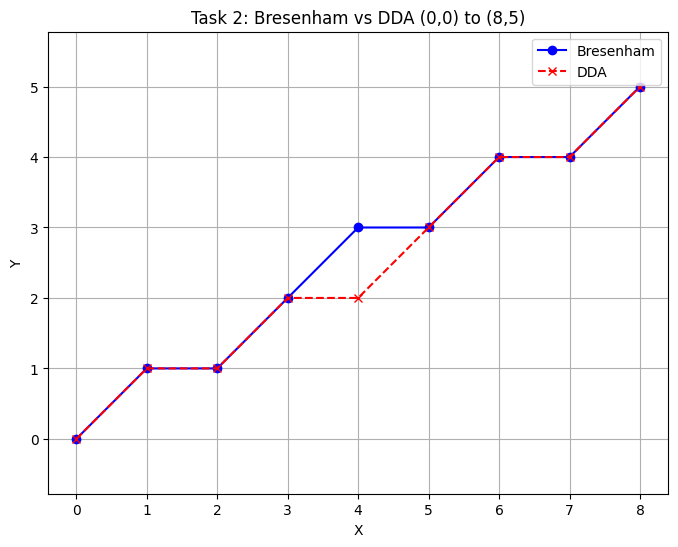


Task 3: Diagonal Line from (0,0) to (10,10)
Bresenham pixel count: 11
DDA pixel count      : 11

Task 4: Draw multiple lines using user input
Enter number of lines to draw: 3

Line 1:
  x1: 1
  y1: 3
  x2: 5
  y2: 3

Line 2:
  x1: 1
  y1: 3
  x2: 8
  y2: 5

Line 3:
  x1: 2
  y1: 0
  x2: 7
  y2: 4


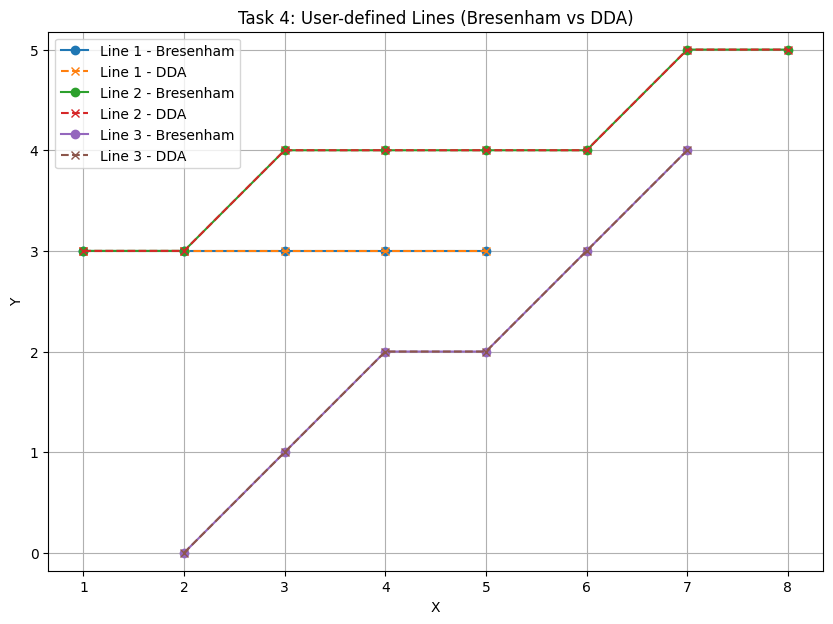

In [ ]:
import matplotlib.pyplot as plt

def bresenham_line(x1, y1, x2, y2, print_steps=False):
    x_points = []
    y_points = []
    pixels_drawn = 0

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    sx = 1 if x2 >= x1 else -1
    sy = 1 if y2 >= y1 else -1

    x, y = x1, y1

    if dx > dy:
        d = 2 * dy - dx
        dE = 2 * dy
        dNE = 2 * (dy - dx)
        for _ in range(dx + 1):
            x_points.append(x)
            y_points.append(y)
            if print_steps:
                print(f"d={d}, x={x}, y={y}")
            pixels_drawn += 1
            if d < 0:
                d += dE
            else:
                y += sy
                d += dNE
            x += sx
    else:
        d = 2 * dx - dy
        dE = 2 * dx
        dNE = 2 * (dx - dy)
        for _ in range(dy + 1):
            x_points.append(x)
            y_points.append(y)
            if print_steps:
                print(f"d={d}, x={x}, y={y}")
            pixels_drawn += 1
            if d < 0:
                d += dE
            else:
                x += sx
                d += dNE
            y += sy

    return x_points, y_points, pixels_drawn

def dda_line(x1, y1, x2, y2):
    x_points = []
    y_points = []

    dx = x2 - x1
    dy = y2 - y1
    steps = int(max(abs(dx), abs(dy)))

    x_inc = dx / steps
    y_inc = dy / steps

    x = x1
    y = y1

    for _ in range(steps + 1):
        x_points.append(round(x))
        y_points.append(round(y))
        x += x_inc
        y += y_inc

    return x_points, y_points

def draw_lines(title, lines, show=True):
    plt.figure(figsize=(10, 7))
    for i, (x1, y1, x2, y2) in enumerate(lines, 1):
        bx, by, _ = bresenham_line(x1, y1, x2, y2)
        dx, dy = dda_line(x1, y1, x2, y2)
        plt.plot(bx, by, marker='o', label=f"Line {i} - Bresenham")
        plt.plot(dx, dy, linestyle='--', marker='x', label=f"Line {i} - DDA")
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("equal")
    plt.grid(True)
    plt.legend()
    if show:
        plt.show()

def task1_draw_8_octants():
    print("\nTask 1: Drawing lines in all 8 octants")
    lines = [
        (2, 2, 10, 4),
        (2, 2, 4, 10),
        (2, 2, -2, 10),
        (2, 2, -2, 6),
        (2, 2, -4, -2),
        (2, 2, 0, -6),
        (2, 2, 6, -2),
        (2, 2, 10, 0),
    ]
    draw_lines("Task 1: Lines in All 8 Octants", lines)

def task2_compare_with_dda(x1, y1, x2, y2):
    print(f"\nTask 2: Comparing Bresenham vs DDA for ({x1},{y1}) to ({x2},{y2})")
    bx, by, b_pixels = bresenham_line(x1, y1, x2, y2)
    dx, dy = dda_line(x1, y1, x2, y2)
    print(f"Bresenham pixel count: {b_pixels}")
    print(f"DDA pixel count      : {len(dx)}")

    plt.figure(figsize=(8, 6))
    plt.plot(bx, by, marker='o', color='blue', label="Bresenham")
    plt.plot(dx, dy, linestyle='--', marker='x', color='red', label="DDA")
    plt.title(f"Task 2: Bresenham vs DDA ({x1},{y1}) to ({x2},{y2})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("equal")
    plt.grid(True)
    plt.legend()
    plt.show()

def task3_count_diagonal():
    print("\nTask 3: Diagonal Line from (0,0) to (10,10)")
    _, _, bresenham_pixels = bresenham_line(0, 0, 10, 10)
    dx, dy = dda_line(0, 0, 10, 10)
    print(f"Bresenham pixel count: {bresenham_pixels}")
    print(f"DDA pixel count      : {len(dx)}")

def task4_draw_multiple_lines():
    print("\nTask 4: Draw multiple lines using user input")
    try:
        n = int(input("Enter number of lines to draw: "))
        lines = []
        for i in range(n):
            print(f"\nLine {i + 1}:")
            x1 = int(input("  x1: "))
            y1 = int(input("  y1: "))
            x2 = int(input("  x2: "))
            y2 = int(input("  y2: "))
            lines.append((x1, y1, x2, y2))
        draw_lines("Task 4: User-defined Lines (Bresenham vs DDA)", lines)
    except ValueError:
        print("Invalid input. Please enter integer values.")

if __name__ == "__main__":
    task1_draw_8_octants()
    task2_compare_with_dda(0, 0, 8, 5)
    task3_count_diagonal()
    task4_draw_multiple_lines()
